In [1]:
#Epidermis_LRC

import pandas as pd
import pickle

#read data
data = pd.read_csv('data/plant/Epidermis_LRC_counts.csv', index_col=0)
data = data.T    #gene in column, cell in row



In [6]:
data_sparse=data


#statistics of cells expressing each gene
gene_expressed_cell_number=data_sparse.astype(bool).sum(axis=0)   #axis=0, sum each column

print(len(gene_expressed_cell_number))
#filter gene expressed in less than 10 cells
gene_expressed_cell_number=gene_expressed_cell_number[gene_expressed_cell_number>9000]
print(len(gene_expressed_cell_number))
#filter gene


data_rm_sparse=data_sparse[gene_expressed_cell_number.index.tolist()]
data_rm_sparse

28958
6920


,AT1G01020,AT1G01050,AT1G01090,AT1G01100,AT1G01140,AT1G01160,AT1G01230,AT1G01240,AT1G01300,AT1G01350,...,ATCG00470,ATCG00500,ATCG00670,ATCG00720,ATCG00740,ATCG00790,ATCG00800,ATCG00820,ATCG01020,ATCG01130
AAACCCAAGCCATTCA_1,1,2,0,1,0,0,0,0,3,1,...,1,1,2,0,0,0,0,1,0,1
AAACCCAAGCTGTTCA_1,0,10,0,1,6,0,1,4,1,5,...,1,1,1,3,0,0,0,1,0,0
AAACCCACAGACCTGC_1,1,2,2,15,0,1,0,0,1,0,...,1,0,1,0,1,2,1,0,1,2
AAACCCAGTCCACAGC_1,0,5,2,14,0,0,2,0,0,0,...,0,0,1,0,1,4,0,1,1,1
AAACCCAGTTAGAAGT_1,0,5,1,1,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGAGTACCG_16,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
TTTGTCAAGTATCTCG_16,1,1,3,24,0,1,4,0,2,0,...,4,7,1,1,4,6,1,5,1,7
TTTGTCACATCCTTGC_16,2,5,0,6,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
TTTGTCAGTGATAAGT_16,0,1,0,2,0,0,0,0,0,0,...,12,5,0,4,1,4,4,5,4,2


In [7]:
#normalize data by row
row_sums = data_rm_sparse.sum(axis=1)   #axis=1, sum by row

data_rm_sparse = data_rm_sparse.div(row_sums, axis=0)*1e4

data_rm_sparse

,AT1G01020,AT1G01050,AT1G01090,AT1G01100,AT1G01140,AT1G01160,AT1G01230,AT1G01240,AT1G01300,AT1G01350,...,ATCG00470,ATCG00500,ATCG00670,ATCG00720,ATCG00740,ATCG00790,ATCG00800,ATCG00820,ATCG01020,ATCG01130
AAACCCAAGCCATTCA_1,0.915667,1.831334,0.000000,0.915667,0.000000,0.000000,0.000000,0.000000,2.747001,0.915667,...,0.915667,0.915667,1.831334,0.000000,0.000000,0.000000,0.000000,0.915667,0.000000,0.915667
AAACCCAAGCTGTTCA_1,0.000000,4.458514,0.000000,0.445851,2.675108,0.000000,0.445851,1.783405,0.445851,2.229257,...,0.445851,0.445851,0.445851,1.337554,0.000000,0.000000,0.000000,0.445851,0.000000,0.000000
AAACCCACAGACCTGC_1,0.652955,1.305909,1.305909,9.794319,0.000000,0.652955,0.000000,0.000000,0.652955,0.000000,...,0.652955,0.000000,0.652955,0.000000,0.652955,1.305909,0.652955,0.000000,0.652955,1.305909
AAACCCAGTCCACAGC_1,0.000000,3.237923,1.295169,9.066183,0.000000,0.000000,1.295169,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.647585,0.000000,0.647585,2.590338,0.000000,0.647585,0.647585,0.647585
AAACCCAGTTAGAAGT_1,0.000000,4.680333,0.936067,0.936067,0.936067,1.872133,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.936067,0.000000,0.000000,0.936067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGAGTACCG_16,4.212300,4.212300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.212300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TTTGTCAAGTATCTCG_16,0.680226,0.680226,2.040678,16.325420,0.000000,0.680226,2.720903,0.000000,1.360452,0.000000,...,2.720903,4.761581,0.680226,0.680226,2.720903,4.081355,0.680226,3.401129,0.680226,4.761581
TTTGTCACATCCTTGC_16,1.650437,4.126093,0.000000,4.951312,0.000000,0.000000,0.000000,0.000000,0.825219,0.825219,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.825219,0.825219,0.000000
TTTGTCAGTGATAAGT_16,0.000000,1.828488,0.000000,3.656976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.941854,9.142439,0.000000,7.313951,1.828488,7.313951,7.313951,9.142439,7.313951,3.656976


In [8]:
#generate gene_to_TF_transform_matrix
import numpy as np

TF_gene_dict=pickle.load(open("data/plant/TF_gene_dict","rb"))

#data_rm_sparse=pickle.load(open("data/zheng68k/data_rm_sparse.dataframe","rb"))

gene_number=len(gene_expressed_cell_number.index.tolist())    #3670
print("gene number: ",gene_number)
TF_number=len(TF_gene_dict)
print("TF number: ",TF_number)

gene_to_TF_transform_matrix=np.zeros((gene_number,TF_number))

TF_list=TF_gene_dict.keys()
for i,gene in enumerate(data_rm_sparse.columns):
    try:
        j=TF_list.index("gene")
        gene_to_TF_transform_matrix[i][j]=1
    except:
        pass
        
gene_to_TF_transform_matrix

pickle.dump(gene_to_TF_transform_matrix,open("data/plant/gene_to_TF_transform_matrix","wb"))

gene number:  6920
TF number:  349


In [9]:
#generate TF_mask

import numpy as np

gene_TF_dict=pickle.load(open("data/plant/gene_TF_dict","rb"))

gene_number = len(gene_expressed_cell_number.index.tolist())    #3670

TF_number = len(TF_gene_dict)

TF_mask = np.zeros((gene_number,TF_number))
error_count=0

for i,gene_id in enumerate(data_rm_sparse.columns):

    for j,TF in enumerate(TF_gene_dict):
        if TF in gene_TF_dict.get(gene_id,[]):
            TF_mask[i][j]=1
        else:
            error_count+=1
        
print(error_count)
print(TF_mask)

pickle.dump(TF_mask,open("data/plant/TF_mask","wb"))

1930728
[[1. 1. 1. ... 1. 1. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
#generate GO_mask

GO_dict={}
with open("data/plant/tair.gaf") as f:
    for line in f:
        if line[0] == "!":
            continue
        
        gene_id=line.split("\t")[2]
        GO_term=line.split("\t")[4]
        if GO_term not in GO_dict:
            GO_dict[GO_term]=[]
        GO_dict[GO_term].append(gene_id)


GO_list=[]
count=0
for item in GO_dict:
    if len(GO_dict[item])>=20:
        count+=1
        GO_list.append(item)
print(count)


gene_dict={}
with open("data/plant/tair.gaf") as f:
    for line in f:
        if line[0]=="!":
            continue
        gene_id=line.split("\t")[2].upper()
        GO_term=line.split("\t")[4]
        if gene_id not in gene_dict:
            gene_dict[gene_id]=[]
        gene_dict[gene_id].append(GO_term)



gene_number=len(gene_expressed_cell_number.index.tolist())    #6033
GO_number=len(GO_list)  

GO_mask=np.zeros((gene_number,GO_number))
error_count=0

for i,gene_id in enumerate(data_rm_sparse.columns):

    for j,GO_term in enumerate(GO_list):
        if GO_term in gene_dict.get(gene_id,"GO:default"):

            GO_mask[i][j]=1
        else:
            error_count+=1
        
print(error_count)

pickle.dump(GO_mask,open("data/plant/GO_mask","wb"))


1252
8648030


In [11]:
#generate GO_TF_mask

TF_number=len(TF_gene_dict)
GO_number=len(GO_list) 

GO_TF_mask=np.zeros((TF_number,GO_number))
error_count=0

for i,TF in enumerate(TF_gene_dict):
    for j,GO in enumerate(GO_list):
        if GO in gene_dict.get(TF,"GO:default"):
            GO_TF_mask[i][j]=1
        else:
            error_count+=1
print(error_count)
        
GO_TF_mask

pickle.dump(GO_TF_mask,open("data/plant/GO_TF_mask","wb"))


436665


In [12]:
#pseudotime
#GO_Net

import math
import numpy as np
import pandas as pd
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.model_selection import train_test_split as ts


pseudotime=pd.read_csv("data/plant/Epidermis_LRC_pseudotime.csv",index_col=0)
label=pseudotime["x"].to_list()
data_rm_sparse.index=label

###############################################################
gene_to_TF_transform_matrix=pickle.load(open("data/plant/gene_to_TF_transform_matrix","rb"))
TF_mask=pickle.load(open("data/plant/TF_mask","rb"))
GO_mask=pickle.load(open("data/plant/GO_mask","rb"))
GO_TF_mask=pickle.load(open("data/plant/GO_TF_mask","rb"))
###############################################################
#data_annotation = pd.read_csv('data/macparland/GSE115469_CellClusterType.txt', sep="\t")
#index_rename_dict = {key: value for key, value in zip(data_annotation['CellName'], data_annotation['CellType'])}
#$data_rm_sparse=data_rm_sparse.rename(index=index_rename_dict)

#normalize by row
#data_rm_sparse = data_rm_sparse.apply(lambda row: row / np.linalg.norm(row), axis=1)

#merge similar cell types
#data_rm_sparse.index = data_rm_sparse.index.str.replace('Hepatocyte_\d+', 'Hepatocyte', regex=True)
#data_rm_sparse.index = data_rm_sparse.index.str.replace('gamma-delta_T_Cells_\d+', 'gamma-delta_T_Cells', regex=True)


#filter low count cells
#data_rm_sparse = data_rm_sparse[data_rm_sparse.index != 'Hepatic_Stellate_Cells']


#novel_cell_type = ['Plasma_Cells']

#data_rm_sparse_novel = data_rm_sparse[data_rm_sparse.index.isin(novel_cell_type)]
#data_rm_sparse_rest = data_rm_sparse[~data_rm_sparse.index.isin(novel_cell_type)]




classes=[]
for celltype in data_rm_sparse.index:
    if celltype not in classes:
        classes.append(celltype)
#print(len(classes),classes)


label_dict_revese={}
label_dict={}
for i,celltype in enumerate(classes):
    label_dict[celltype]=i
    label_dict_revese[i]=celltype
label_dict
################################################################



def gen_mask(row,col,percent=0.5,num_zeros=None):
    if num_zeros is None:
        #Total number being masked is 0.5 by default
        num_zeros=int((row*col)*percent)
    
    mask=np.hstack([np.zeros(num_zeros),np.ones(row*col-num_zeros)])
    np.random.shuffle(mask)
    return mask.reshape(row,col)

class LinearFunction(torch.autograd.Function):
    """
    autograd function which masks it's weights by 'mask'.
    """
    
    #Not that both forward and backword are @staticmethod

    
    #bias, mask is an optional argument
    @staticmethod
    def forward(ctx, input, weight, bias=None, mask=None):
        if mask is not None:
            #change weight to 0 where mask == 0

            weight=weight*mask
 
        output=input.mm(weight.t())

        if bias is not None:
            output+=bias.unsqueeze(0).expand_as(output)
        
        ctx.save_for_backward(input, weight, bias, mask)

        return output
    
    #This function has noly a single output, so it gets only one gradient
    @staticmethod
    def backward(ctx,grad_output):
        input,weight,bias,mask = ctx.saved_tensors
        grad_input=grad_weight=grad_bias=grad_mask=None
        
        #These meeds_input_grad checks are optional and there only to improve efficiency.
        #If you want to make your code simpler, you can skip them. Returning gradients for
        #inputs that don't require it is not an error.
        if ctx.needs_input_grad[0]:
            grad_input=grad_output.mm(weight)
        
        if ctx.needs_input_grad[1]:
            grad_weight=grad_output.t().mm(input)
            
            if mask is not None:
                
                #change grad_weight to 0 where mask == 0
                grad_weight=grad_weight*mask

        
        #if bias is not None and ctx.need_input_grad[2]:
        if ctx.needs_input_grad[2]:
            grad_bias=grad_output.sum(0).squeeze(0)
        
        return grad_input,grad_weight,grad_bias,grad_mask
    

       
class CustomizedLinear(nn.Module):
    def __init__(self,input_features,output_features, bias=None, mask=None):
        """
        Arguments
        mask [numpy array]:
            The shape is (n_input_fearues,n_output_features).
            The elements are 0 or 1 which delcare un-connected or connected.
            
        bias [bool]:
            flg of bias.
        """
        super(CustomizedLinear,self).__init__()
        self.input_features=input_features
        self.out_features=output_features
        
        #nn.Parameter is a spetial kind of Tensor, that will get
        #automatically registered as Module's parameter once it's assigned
        #as an attribute
        self.weight=nn.Parameter(torch.Tensor(self.out_features,self.input_features))
        
        if bias:

            self.bias=nn.Parameter(torch.Tensor(self.out_features))
        else:
            #You should always register all possible parameters, but the
            #optinal ones can be None if you want.
            self.register_parameter("bias",None)
            
        #Initialize the above parameters (weight and bias). Important!
        self.init_params()
        
        #mask should be registered after weight and bias
        if mask is not None:
            mask=torch.tensor(mask,dtype=torch.float).t()
            self.mask=nn.Parameter(mask,requires_grad=False)
        else:
            self.register_parameter("mask",None)

        
    def init_params(self):
        stdv=1./math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv,stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv,stdv)
                
    def forward(self,input):
        #See the autograd section for explanation of what happens here.
        
        output=LinearFunction.apply(input,self.weight,self.bias,self.mask)
        
        return output
        
    def extra_repr(self):
        #(Optional) Set the extra informatioin about this module. You can test
        #it by printing an object of this class.
        return "input_features={}, output_features={}, bias={}, mask={}".format(
            self.input_features, self.out_features,
            self.bias is not None, self.mask is not None)
        
        
class GO_Net(nn.Module):
    def __init__(self,in_size,out_size,ratio=[0.006525,0,0]):
        super(GO_Net,self).__init__()

        self.gene_number=len(gene_expressed_cell_number.index.tolist())    #6033
        self.TF_number=len(TF_gene_dict)   
        self.GO_number=len(GO_list)
        self.class_number=3

        self.gene_to_TF_transform_matrix=torch.tensor(gene_to_TF_transform_matrix,dtype=torch.float32)
        
        
        
        self.bn0=nn.BatchNorm1d(self.gene_number)
        #self.fc1=CustomizedLinear(in_size,2290,mask=gen_mask(3443,2290,ratio[0]))  
        #self.fc1=CustomizedLinear(in_size,1946,mask=gen_mask(2903,1946,ratio[0]))        
        self.fc1=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        self.gene_to_GO_layer=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        #self.fc1=CustomizedLinear(in_size,2290,mask=np.ones((3443,2290)))
    
        self.bn1=nn.BatchNorm1d(self.GO_number)
                
        self.fc2=CustomizedLinear(self.GO_number,out_size,mask=gen_mask(self.GO_number,out_size,ratio[1]))
        self.bn2=nn.BatchNorm1d(out_size)

        self.gene_to_TF_layer=CustomizedLinear(self.gene_number,self.TF_number,mask=TF_mask)
        self.TF_to_GO_layer=CustomizedLinear(self.TF_number,self.GO_number,mask=GO_TF_mask)
        
        self.fc3=CustomizedLinear(100,100,mask=gen_mask(100,100,ratio[1]))

        self.fc4=CustomizedLinear(100,out_size,mask=gen_mask(100,out_size,ratio[1]))
        
        self.relu=nn.ReLU()
        self.leaky_relu=nn.LeakyReLU()
        #self.dropout = nn.Dropout(0.1)
        for module in self.modules():
            if isinstance(module,nn.Linear):
                nn.init.uniform_(module.weight,a=0,b=1)
            elif isinstance(module,(nn.BatchNorm1d,nn.GroupNorm)):
                nn.init.constant_(module.weight,1)
                nn.init.constant_(module.bias,0)

                        
    def forward(self,x):

        #x=self.bn0(x)
        TF_residul=torch.matmul(x,self.gene_to_TF_transform_matrix)

        TF_derived_from_gene=self.gene_to_TF_layer(x)

        TF_sum=TF_residul+TF_derived_from_gene
        #TF_sum=TF_derived_from_gene

        GO_derived_from_TF=self.TF_to_GO_layer(TF_sum)

        GO_derived_from_gene=self.gene_to_GO_layer(x)

        GO_sum=GO_derived_from_TF+GO_derived_from_gene

        #x=self.bn0(x)
        #x=self.fc1(x)
        #x=self.bn1(x)
        #x=self.relu(x)
        #x=self.dropout(x)
        GO_sum=self.leaky_relu(GO_sum)

        #x=torch.tanh(x) 
        #print(161,self.fc1.weight)
        x=self.fc2(GO_sum)
        #x=self.bn2(x)
        #x=self.relu(x)
        #x=self.leaky_relu(x)
        #x=self.fc3(x)
        #x=self.leaky_relu(x)
        #x=self.fc4(x)
 
        return x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
    
class Reconstraction(nn.Module):
    def __init__(self,in_size,out_size):
        super(Reconstraction,self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(in_size, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 1000),
            nn.LeakyReLU(True),
            nn.Linear(1000, out_size)
        )

    def forward(self, x):
        x = self.decoder(x)
        return x
    


 
class MyDataset(Dataset):
    def __init__(self, x,y):
        self.x=x
        self.y=y

    def __getitem__(self, index):
        features = self.x[index]
        label = self.y[index]
        return features, label

    def __len__(self):
        return len(self.x)

def accuracy_score(y_test,y_pred):
    t=0
    f=0
    for i in range(len(y_test)):
        if y_test[i]==y_pred[i]:
            t+=1
        else:
            f+=1
    return(t/(t+f))


#training
input_size = len(data_rm_sparse.columns)
output_size = len(classes)

learning_rate = 0.1
epochs = 3

model = GO_Net(input_size, output_size,ratio=[0,0,0])

reconstraction_model=Reconstraction(len(classes),len(data_rm_sparse.columns))


"""
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

x = torch.randn(10, input_size)
y = torch.randn(10, output_size)

for i in range(epochs):
    optimizer.zero_grad()
    output = model(x)

    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
"""
# define loss function and optimizer

optimizer = optim.Adam(model.parameters(), lr=0.001)
reconstraction_optimizer = optim.Adam(reconstraction_model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()
reconstraction_criterion = nn.MSELoss()



data_train_x=data_rm_sparse
data_train_y=data_rm_sparse.index
#x_train,x_test,y_train,y_test,train_barcodes,test_barcodes = ts(data_train_x.to_numpy(),data_train_y.to_numpy(),data_annotation["CellName"],test_size=0.2,random_state=1, shuffle=True)
x_train,x_test,y_train,y_test = ts(data_train_x.to_numpy(),data_train_y.to_numpy(),test_size=0.2,random_state=1, shuffle=True)

#x_train=x_train[0:400]
#y_train=y_train[0:400]

#label_dict={25:0,26:1,27:2,33:3,34:4}
y_train_relabeled=[label_dict[label] for label in y_train]
y_test_relabeled=[label_dict[label] for label in y_test]


#train_size=20000

#x_train=x_train[0:train_size]
#y_train_relabeled=y_train_relabeled[0:train_size]

train_data=MyDataset(x_train,y_train_relabeled)
train_loader=DataLoader(train_data, batch_size=60, shuffle=True)

num_epochs=50
# 训练模型
for epoch in range(num_epochs):
    running_loss = 0.0
    reconstraction_running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        #print(labels)
        inputs=Variable(inputs).to(torch.float32)
        labels=Variable(labels).to(torch.long)
        # 将梯度缓存清零
        optimizer.zero_grad()

        # 前向传播、计算损失和反向传播
        outputs,_,_,_ = model(inputs)

        loss = criterion(outputs, labels)


        #reconstraction
        

        #reconstraction_input=reconstraction_model(outputs)
        #reconstraction_loss = reconstraction_criterion(reconstraction_input, inputs)

        #reconstraction_optimizer.zero_grad()

        #combined_loss=loss+reconstraction_loss
        #combined_loss.backward()
        loss.backward()
    
        optimizer.step()
        #reconstraction_optimizer.step()


        #reconstraction_running_loss += reconstraction_loss.item()
        running_loss += loss.item()

        if i % 40 == 0:
            pass
            #print(i)
            #print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
        
        if i>400:
            break

    test_data=MyDataset(x_test,y_test_relabeled)
    test_loader=DataLoader(test_data, batch_size=32, shuffle=False)
    result=[]
    for i, data in enumerate(test_loader):
        inputs, labels = data
        
        inputs=Variable(inputs).to(torch.float32)

        labels=Variable(labels).to(torch.long)
        
        outputs,_,_,_ = model(inputs)
        pred = list(torch.max(outputs, 1)[1].numpy())
        result.extend(pred)
        #print(pred,labels)
        if i>100:
            break
    accuracy = accuracy_score(y_test_relabeled[0:len(result)],result)
        
            #########
    print(epoch," accuracy:\t",accuracy," loss:\t",running_loss / len(train_loader)," \treconstraction_loss:\t",reconstraction_running_loss / len(train_loader))
    
    #save model

    #pickle.dump(model,open("model/scGO_plant_pseudotime_model.pkl","wb"))
     


0  accuracy:	 0.5520833333333334  loss:	 0.7658867602017527  	reconstraction_loss:	 0.0
1  accuracy:	 0.5909926470588235  loss:	 0.6305185210482925  	reconstraction_loss:	 0.0
2  accuracy:	 0.5894607843137255  loss:	 0.5844949626075435  	reconstraction_loss:	 0.0
3  accuracy:	 0.5533088235294118  loss:	 0.5406185613469222  	reconstraction_loss:	 0.0
4  accuracy:	 0.5784313725490197  loss:	 0.5147077004518202  	reconstraction_loss:	 0.0


KeyboardInterrupt: 

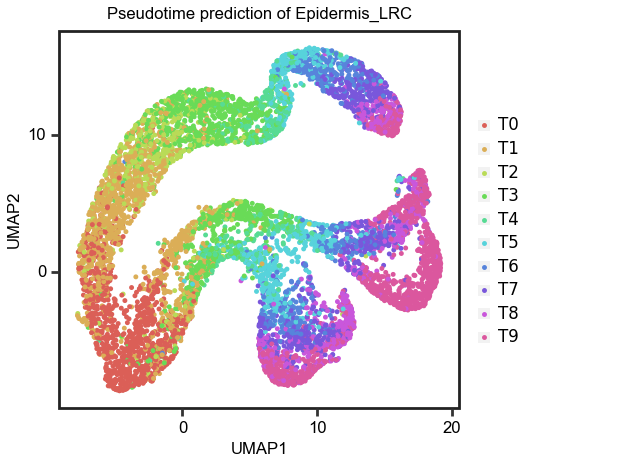

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.1500000000000004 x 2.35 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/plant_pseudotime_prediction_of_Epidermis_UMAP.pdf


In [15]:
y_test_relabeled=[label_dict[label] for label in y_test]



test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=9000, shuffle=False)
result=[]
y_prob=[]
#y_test=[]
for i, data in enumerate(test_loader):
    inputs, labels = data
        
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
        
    outputs,GO_sum,TF_derived_from_gene,GO_derived_from_TF = model(inputs)    #x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)

    y_prob=outputs.detach().numpy()
    #y_test=list(labels.numpy())

pred=[label_dict_revese[label] for label in pred]


#UMAP pseudotime
from plotnine import *
import pandas as pd


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"



data = pd.read_csv("data/plant/Epidermis_LRC_umap_data.csv",index_col=0)
data.columns=["UMAP1","UMAP2"]

umap_train, umap_test = ts(data,test_size=0.2,random_state=1, shuffle=True)

data=umap_test

data["prediction"]=pred

p =(ggplot(data, aes(x='UMAP1', y='UMAP2',color="factor(prediction)"))
    + geom_point(size=0.001,alpha=1)
    +theme(
        figure_size=[2.35+0.8,2.35],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black",hjust=0.5),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        #legend_position=(0.75,0.9), 
        legend_direction='vertical',
        #legend_position='right',
        legend_key_size=4) #change legend text font size))
    #+scale_color_manual(values =[c1, c2, c3]) 
    #+geom_density_2d(colour = "#F8766D",size=0.2,data=data_U,alpha=0.5)
    #+geom_density_2d(colour = "#00BA38",size=0.2,data=data_psU,alpha=0.5)
    +ggtitle("Pseudotime prediction of Epidermis_LRC")
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/plant_pseudotime_prediction_of_Epidermis_UMAP.pdf')
